In [1]:
%matplotlib inline
#
from lrgsglib.core import *
#
move_to_rootf()
plt.style.use('ipynb/nb_plotsheet.mplstyle')
#
path_suppinf = PATHPLOT / Path(PATHNPAPR, 'suppinf')

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


### Ising XERR

In [2]:
side = 96
geo = 'sqr'
pflip = 0.25

In [3]:
l = Lattice2D(side, geo, pflip=pflip, init_nw_dict=True)
l.flip_sel_edges(l.nwDict['randXERR']['G'])
l.compute_k_eigvV(10)

In [4]:
isdy = IsingDynamics(l, T=0.5, ic=f'ground_state_2', runlang='C3', rndStr=True, out_suffix='gs_2')
isdy.init_ising_dynamics()
l.export_edgel_bin(exName=isdy.id_string_isingdyn)
isdy.run(thrmSTEP=50)

In [5]:
ene = np.fromfile(Path(l.isingpath) / Path(f"ene_p={pflip:.3g}_T=0.5_gs_2.bin"))

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.imshow(l.get_eigV_bin_check(2).reshape(*l.syshape))
ax2.imshow(isdy.s.reshape(*l.syshape))
ax3.plot(ene, '-')
ax3.set_xscale('log')
# ax3.xaxis.set_major_locator(plt.MaxNLocator(nbins=3, prune=None))
ax3.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=4))
ax3.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs='auto', numticks=10))
fig.tight_layout()

### Topological Symmetry Breaking

In [5]:
dat = pk.load(open("/home/opisthofulax/PhD/projects/complex-networks/lrgsglib/data/l2d_squared/spect/N=1024/dist_eigval_0.1_rand_1000.pkl", "rb"))

(array([  222.,  2365.,  5068.,  6491.,  7333.,  7787.,  8218.,  8591.,
         8808.,  9050.,  9277.,  9379.,  9545.,  9657.,  9787.,  9967.,
        10178., 10061., 10231., 10483., 10768., 11091., 11143., 11088.,
        10847., 10402., 10101.,  9946.,  9763., 10022., 10351., 10600.,
        10952., 11035., 11240., 11366., 11438., 11551., 11625., 11891.,
        12024., 12232., 12476., 12742., 12976., 13241., 13490., 13797.,
        14109., 15195., 15195., 14109., 13797., 13490., 13241., 12976.,
        12742., 12476., 12232., 12024., 11891., 11625., 11551., 11438.,
        11366., 11240., 11035., 10952., 10600., 10351., 10022.,  9763.,
         9946., 10101., 10402., 10847., 11088., 11143., 11091., 10768.,
        10483., 10231., 10061., 10178.,  9967.,  9787.,  9657.,  9545.,
         9379.,  9277.,  9050.,  8808.,  8591.,  8218.,  7787.,  7333.,
         6491.,  5068.,  2365.,   222.]),
 array([0.12601567, 0.20349535, 0.28097504, 0.35845473, 0.43593441,
        0.5134141 , 0.5908

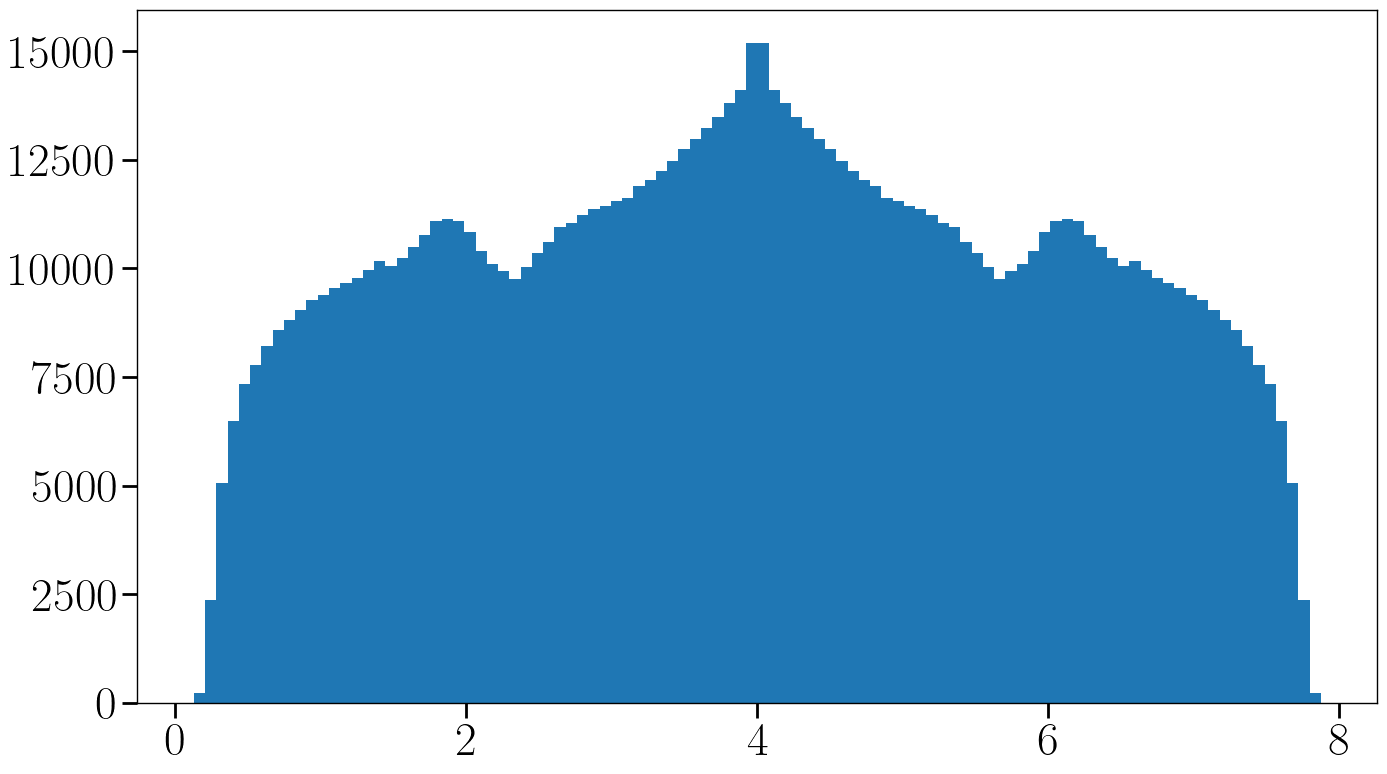

In [7]:
plt.hist(dat, bins=100)

In [18]:
side = 64
geo = 'sqr'
cell = 'randXERR'
pflip = 0.35
navg = 1

In [19]:
l = Lattice2D(side, geo=geo, pflip=pflip, init_nw_dict=True)
# l.flip_random_fract_edges()
l.flip_sel_edges(l.nwDict['randXERR']['G'])
l.compute_full_laplacian_spectrum()

In [20]:
spect = []

In [21]:
for _ in range(navg):
    l = Lattice2D(side, geo=geo, pflip=pflip)
    l.flip_random_fract_edges()
    l.compute_full_laplacian_spectrum()
    spect.extend(l.eigv)

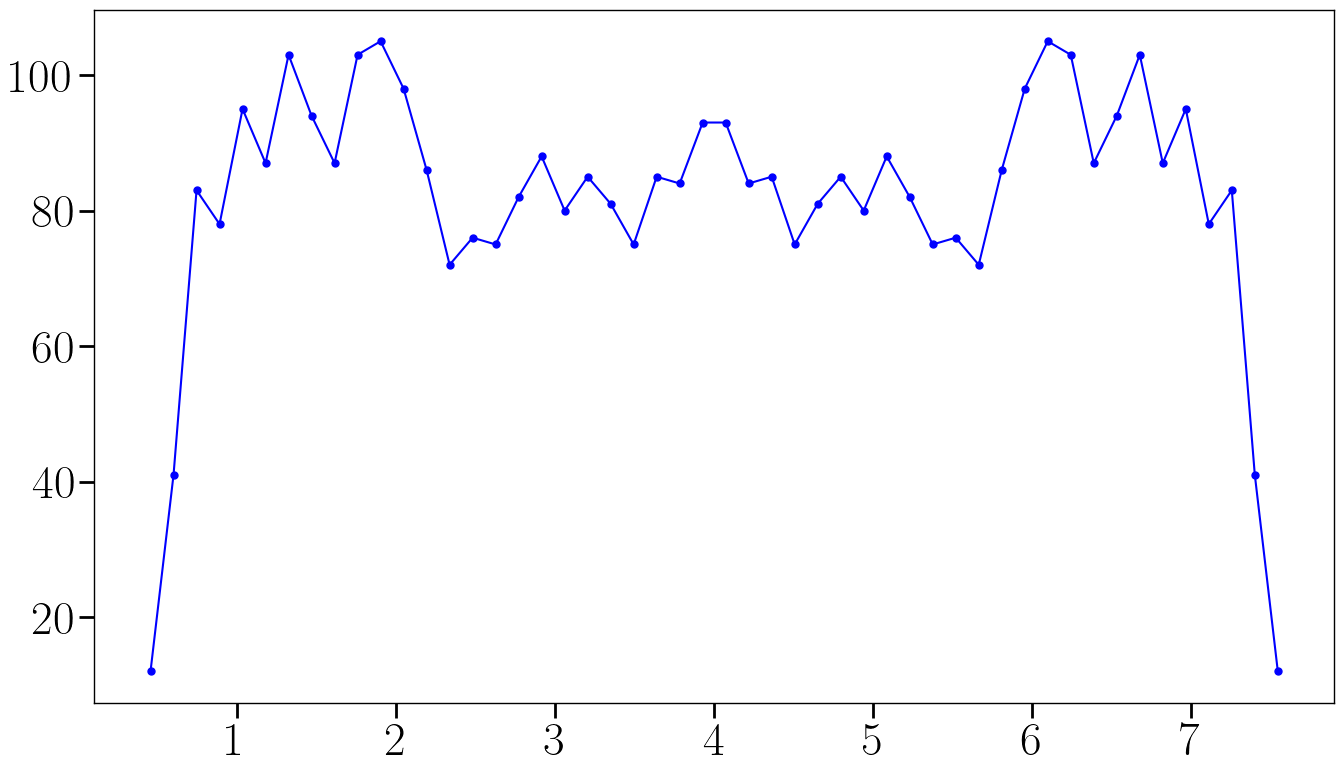

In [22]:
counts, bin_edges = np.histogram(spect, bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.plot(bin_centers, counts, marker='o', linestyle='-', color='b')

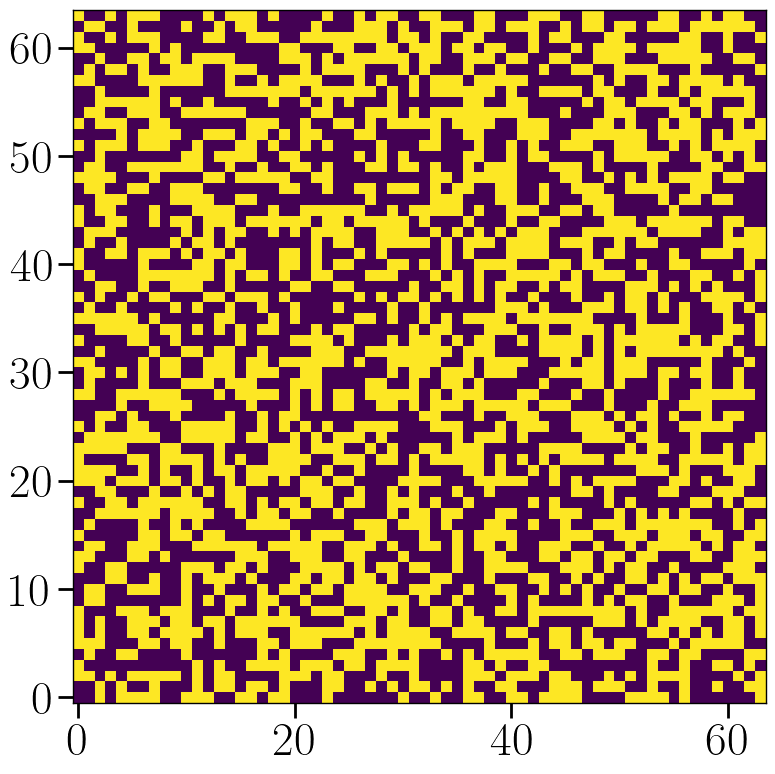

In [30]:
plt.imshow(np.sign(l.eigV[2000].reshape(*l.syshape)))